# 2
This is the second part of the data preprocessing for building the target variable, the **Shannon Diversity Index**. After merging the datasets, this part is designed to calculate the Shannon Index across stations, per season, and per year. I included the year information because without it we’d only have about 90 instances, which isn’t enough for meaningful analysis. This step also cleans the merged dataset to prepare it for modeling.

The first part of the code demonstrates the logic behind calculating the Shannon Index using a specific example of a selected station and season.(formula can be found online) This helps illustrate how the proportions and diversity calculations work before applying them to the entire dataset.

Once the logic is clear, we apply it to the merged dataset, grouping the data by station, season, and year. This gives us the Shannon Index for each station-season-year combination, along with sediment information from the other datasets. There's also a process of dealing with outliers (only one species in a station). I chose not to remove duplicates (such as records from the same station but with slightly different latitude and longitude) in case that spatial variation is useful in future analyses.

With this cleaned and enriched dataset, we can now move forward to model the relationship between the Shannon Diversity Index and sediment characteristics!

In [62]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('data/Musquash_MPA_Benthos_Infauna.csv', encoding='latin1')

In [63]:
# Step 1: Filter data for a specific station and season (example: Station 1, Winter)
station = 1
season = 'Winter'

filtered_data = df1[(df1['station'] == station) & (df1['season_saison'] == season)]

In [64]:
# Step 2: Group by species and sum their counts
species_counts = filtered_data.groupby('scientificName_Nom_scientifique')['total_count'].sum().reset_index()
print("Species and their total counts at Station 1 in Winter:")
print(species_counts)

Species and their total counts at Station 1 in Winter:
              scientificName_Nom_scientifique  total_count
0                                       Acari          4.0
1                               Alitta virens          1.0
2                         Anobothrus gracilis          1.0
3                Aricidea (Acmira) catherinae         39.0
4                             Ceratopogonidae          9.0
5                                Cirratulidae         27.0
6                        Cossura longocirrata        342.0
7                                  Cyclopoida          1.0
8                                Eteone flava          4.0
9                               Harpacticoida         55.0
10                               Kirkegaardia          2.0
11                        Levinsenia gracilis         54.0
12                      Manayunkia aestuarina          4.0
13                      Micronephthys cornuta          4.0
14                               Mya arenaria          2.0
1

In [65]:
# Step 3: Calculate total count of all species at this station and season
total_total_count = species_counts['total_count'].sum()
print(f"\nTotal count of all species at Station {station} in {season}: {total_count}")


Total count of all species at Station 1 in Winter: 1023.0


In [66]:
# Step 4: Calculate proportions (p_i) for each species
species_counts['p_i'] = species_counts['total_count'] / total_total_count
print("\nProportions (p_i) of each species:")
print(species_counts[['scientificName_Nom_scientifique', 'p_i']])


Proportions (p_i) of each species:
              scientificName_Nom_scientifique       p_i
0                                       Acari  0.003910
1                               Alitta virens  0.000978
2                         Anobothrus gracilis  0.000978
3                Aricidea (Acmira) catherinae  0.038123
4                             Ceratopogonidae  0.008798
5                                Cirratulidae  0.026393
6                        Cossura longocirrata  0.334311
7                                  Cyclopoida  0.000978
8                                Eteone flava  0.003910
9                               Harpacticoida  0.053763
10                               Kirkegaardia  0.001955
11                        Levinsenia gracilis  0.052786
12                      Manayunkia aestuarina  0.003910
13                      Micronephthys cornuta  0.003910
14                               Mya arenaria  0.001955
15                             Mytilus edulis  0.003910
16          

In [67]:
# Step 5: Calculate p_i * ln(p_i) for each species
species_counts['p_i_ln_p_i'] = species_counts['p_i'] * np.log(species_counts['p_i'])
print("\nValues of p_i * ln(p_i) for each species:")
print(species_counts[['scientificName_Nom_scientifique', 'p_i_ln_p_i']])


Values of p_i * ln(p_i) for each species:
              scientificName_Nom_scientifique  p_i_ln_p_i
0                                       Acari   -0.021678
1                               Alitta virens   -0.006775
2                         Anobothrus gracilis   -0.006775
3                Aricidea (Acmira) catherinae   -0.124546
4                             Ceratopogonidae   -0.041642
5                                Cirratulidae   -0.095929
6                        Cossura longocirrata   -0.366299
7                                  Cyclopoida   -0.006775
8                                Eteone flava   -0.021678
9                               Harpacticoida   -0.157159
10                               Kirkegaardia   -0.012194
11                        Levinsenia gracilis   -0.155270
12                      Manayunkia aestuarina   -0.021678
13                      Micronephthys cornuta   -0.021678
14                               Mya arenaria   -0.012194
15                           

In [68]:
# Step 6: Sum the values and apply negative sign to get Shannon Index
shannon_index = -species_counts['p_i_ln_p_i'].sum()
print(f"\nShannon Diversity Index at Station {station} in {season}: {shannon_index}")


Shannon Diversity Index at Station 1 in Winter: 2.3420890010123756


In [69]:
df = pd.read_csv('final_merged_data_no_replicates.csv', encoding='latin1')

In [70]:
import numpy as np
import pandas as pd

# Step 1: Group data by station, season, and year
species_counts = df1.groupby(['station', 'season_saison', 'year_année', 'scientificName_Nom_scientifique'])['total_count'].sum().reset_index()

# Step 2: Function to calculate Shannon Diversity Index
def shannon_index(group):
    total_count = group['total_count'].sum()
    group['p_i'] = group['total_count'] / total_count
    group['p_i_ln_p_i'] = group['p_i'] * np.log(group['p_i'])
    return -group['p_i_ln_p_i'].sum()

# Step 3: Apply the function to each group
shannon_indices = species_counts.groupby(['station', 'season_saison', 'year_année']).apply(shannon_index).reset_index(name='shannon_index')
# Step 4: Merge Shannon Index back to the original DataFrame
df_with_shannon = df1.merge(shannon_indices, on=['station', 'season_saison', 'year_année'], how='left')

# Step 4: Display the Shannon Diversity Index for each station, season, and year
df_with_shannon

c:\Users\CPK\.conda\envs\ml\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\CPK\AppData\Local\Temp\ipykernel_16448\143653977.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shannon_indices = species_counts.groupby(['station', 'season_saison', 'year_année']).apply(shannon_index).reset_index(name='shannon_index')


,set_id,lat,lon,station,strata_strate,day_jour,month_mois,year_année,season_saison,scientificName_Nom_scientifique,scientificNameID_Identifiant_du_nom_scientifique,total_count,tot_wt_g,shannon_index
0,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Manayunkia aestuarina,urn:lsid:marinespecies.org:taxname:130926,4.0,6407.0,1.710841
1,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Alitta virens,urn:lsid:marinespecies.org:taxname:234851,1.0,6407.0,1.710841
2,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Nephtys ciliata,urn:lsid:marinespecies.org:taxname:130356,1.0,6407.0,1.710841
3,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Micronephthys cornuta,urn:lsid:marinespecies.org:taxname:869884,4.0,6407.0,1.710841
4,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Nephtys incisa,urn:lsid:marinespecies.org:taxname:130362,1.0,6407.0,1.710841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7896,2021.09.030,45.183700,-66.248580,30,channel,23,9,2021,Autumn,Phoronis,urn:lsid:marinespecies.org:taxname:128545,40.0,3626.0,1.236639
7897,2021.09.030,45.183700,-66.248580,30,channel,23,9,2021,Autumn,Scoletoma laurentiana,urn:lsid:marinespecies.org:taxname:1491000,40.0,3626.0,1.236639
7898,2021.09.030,45.183700,-66.248580,30,channel,23,9,2021,Autumn,Micronephthys cornuta,urn:lsid:marinespecies.org:taxname:869884,4.0,3626.0,1.236639
7899,2021.09.030,45.183700,-66.248580,30,channel,23,9,2021,Autumn,Streblospio benedicti,urn:lsid:marinespecies.org:taxname:131191,68.0,3626.0,1.236639


In [71]:
species_richness = df_with_shannon.groupby(['station', 'season_saison', 'year_année'])['scientificName_Nom_scientifique'].nunique().reset_index(name='species_count')

# Step 7: Merge species richness with Shannon index
df_with_richness = df_with_shannon.merge(species_richness, on=['station', 'season_saison', 'year_année'], how='left')

# Step 8: Display groups with only one species
single_species_groups = df_with_richness[df_with_richness['species_count'] == 1]
single_species_groups

,set_id,lat,lon,station,strata_strate,day_jour,month_mois,year_année,season_saison,scientificName_Nom_scientifique,scientificNameID_Identifiant_du_nom_scientifique,total_count,tot_wt_g,shannon_index,species_count
1786,2011.12.010,45.163767,-66.252383,10,subtidal,14,12,2011,Autumn,Nematoda,urn:lsid:marinespecies.org:taxname:799,3.0,253.0,-0.0,1
2639,2014.08.008,45.160283,-66.234017,8,subtidal,11,8,2014,Summer,Nucula proxima,urn:lsid:marinespecies.org:taxname:156916,1.0,671.0,-0.0,1
5365,2016.09.012,45.177990,-66.248460,12,intertidal,1,9,2016,Summer,Nereis,urn:lsid:marinespecies.org:taxname:129379,9.0,2521.0,-0.0,1
5366,2016.09.012,45.177990,-66.248460,12,intertidal,1,9,2016,Summer,Nereis,urn:lsid:marinespecies.org:taxname:129379,3.0,2521.0,-0.0,1
5367,2016.09.012,45.177990,-66.248460,12,intertidal,1,9,2016,Summer,Nereis,urn:lsid:marinespecies.org:taxname:129379,1.0,2521.0,-0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7221,2017.11.010,45.173700,-66.234800,10,intertidal,21,11,2017,Autumn,Nereis,urn:lsid:marinespecies.org:taxname:129379,4.0,3962.0,-0.0,1
7222,2017.11.010,45.173700,-66.234800,10,intertidal,21,11,2017,Autumn,Nereis,urn:lsid:marinespecies.org:taxname:129379,16.0,3962.0,-0.0,1
7223,2017.11.010,45.173700,-66.234800,10,intertidal,21,11,2017,Autumn,Nereis,urn:lsid:marinespecies.org:taxname:129379,1600.0,3962.0,-0.0,1
7224,2017.11.010,45.173700,-66.234800,10,intertidal,21,11,2017,Autumn,Nereis,urn:lsid:marinespecies.org:taxname:129379,10.0,3962.0,-0.0,1


In [72]:
most_frequent_single_species = single_species_groups.groupby('scientificName_Nom_scientifique').size().reset_index(name='count').sort_values(by='count', ascending=False)
print("\nSpecies that appear most frequently as the only species:")
print(most_frequent_single_species)


Species that appear most frequently as the only species:
  scientificName_Nom_scientifique  count
1                          Nereis   1861
0                        Nematoda      1
2                  Nucula proxima      1


Nereis is a genus of polychaete worms commonly found in marine environments. Its dominance in your dataset implies low species diversity in those locations.

Polychaetes like Nereis are often opportunistic species, thriving in disturbed or nutrient-rich environments. Their high abundance could indicate:

Environmental stress or disturbance (e.g., pollution, eutrophication).
Sediment enrichment from aquaculture activities like feed wastage or organic loading.

The dominance of Nereis suggests potential environmental stress from aquaculture operations, such as feed accumulation or sediment enrichment.

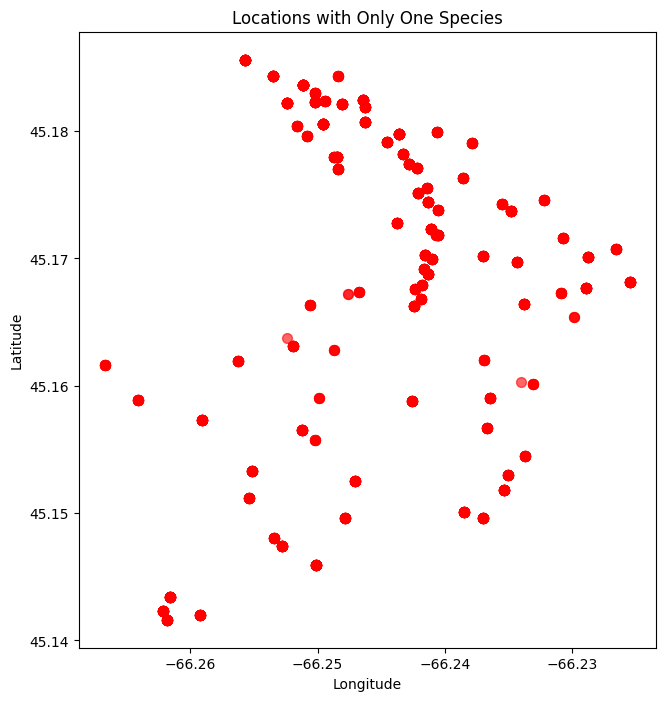

In [73]:
import geopandas as gpd
from shapely.geometry import Point
# Step 10: Visualize locations with only one species on a map
geometry = [Point(xy) for xy in zip(single_species_groups['lon'], single_species_groups['lat'])]
geo_df = gpd.GeoDataFrame(single_species_groups, geometry=geometry)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
geo_df.plot(ax=ax, color='red', alpha=0.6, markersize=50)
plt.title('Locations with Only One Species')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

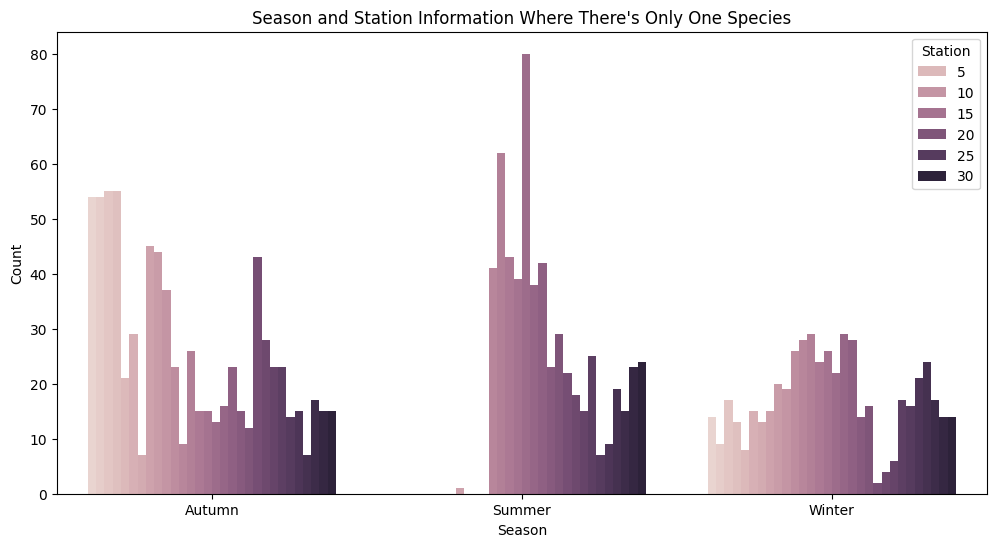

In [74]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter data for groups with only one species
single_species_groups = df_with_richness[df_with_richness['species_count'] == 1]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=single_species_groups, x='season_saison', hue='station')
plt.title('Season and Station Information Where There\'s Only One Species')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Station')
plt.show()

In [75]:
# Extract year information for summer single-species occurrences
summer_single_species_years = single_species_groups[single_species_groups['season_saison'] == 'Summer'][['station', 'year_année', 'scientificName_Nom_scientifique']]
print("\nYears with single species occurrences in Summer:")
print(summer_single_species_years)


Years with single species occurrences in Summer:
      station  year_année scientificName_Nom_scientifique
2639        8        2014                  Nucula proxima
5365       12        2016                          Nereis
5366       12        2016                          Nereis
5367       12        2016                          Nereis
5368       12        2016                          Nereis
...       ...         ...                             ...
5934       30        2016                          Nereis
5935       30        2016                          Nereis
5936       30        2016                          Nereis
5937       30        2016                          Nereis
5938       30        2016                          Nereis

[575 rows x 3 columns]


In [76]:
df_with_shannon[(df_with_shannon['year_année'] == 2016) & (df_with_shannon['scientificName_Nom_scientifique'] == 'Nereis')]

,set_id,lat,lon,station,strata_strate,day_jour,month_mois,year_année,season_saison,scientificName_Nom_scientifique,scientificNameID_Identifiant_du_nom_scientifique,total_count,tot_wt_g,shannon_index
5354,2016.09.011,45.17488,-66.24723,11,intertidal,1,9,2016,Summer,Nereis,urn:lsid:marinespecies.org:taxname:129379,1.0,3417.0,0.363589
5355,2016.09.011,45.17488,-66.24723,11,intertidal,1,9,2016,Summer,Nereis,urn:lsid:marinespecies.org:taxname:129379,3104.0,3417.0,0.363589
5356,2016.09.011,45.17488,-66.24723,11,intertidal,1,9,2016,Summer,Nereis,urn:lsid:marinespecies.org:taxname:129379,2208.0,3417.0,0.363589
5357,2016.09.011,45.17488,-66.24723,11,intertidal,1,9,2016,Summer,Nereis,urn:lsid:marinespecies.org:taxname:129379,8.0,3417.0,0.363589
5358,2016.09.011,45.17488,-66.24723,11,intertidal,1,9,2016,Summer,Nereis,urn:lsid:marinespecies.org:taxname:129379,108.0,3417.0,0.363589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6496,2016.12.030,45.16758,-66.24238,30,channel,2,12,2016,Autumn,Nereis,urn:lsid:marinespecies.org:taxname:129379,1.0,1741.0,-0.000000
6497,2016.12.030,45.16758,-66.24238,30,channel,2,12,2016,Autumn,Nereis,urn:lsid:marinespecies.org:taxname:129379,1.0,1741.0,-0.000000
6498,2016.12.030,45.16758,-66.24238,30,channel,2,12,2016,Autumn,Nereis,urn:lsid:marinespecies.org:taxname:129379,1.0,1741.0,-0.000000
6499,2016.12.030,45.16758,-66.24238,30,channel,2,12,2016,Autumn,Nereis,urn:lsid:marinespecies.org:taxname:129379,1.0,1741.0,-0.000000


From the analysis it’s clear that Nereis pops up a lot as the only species, but it doesn’t seem tied to any specific location or season. Some spots have just one single count, while others have hundreds, so it probably doesn’t mean much in terms of biodiversity. It might even be a sampling error from data source. So we could decide to remove all the entries where there’s just a single species from the dataset.

In [77]:
filtered_df = df_with_richness[~((df_with_richness['species_count'] == 1))]
filtered_df.to_csv('filtered_data.csv', index=False)